    
<h1 align="center">Customer Personality Analysis and Segmentation </h1>
<br>


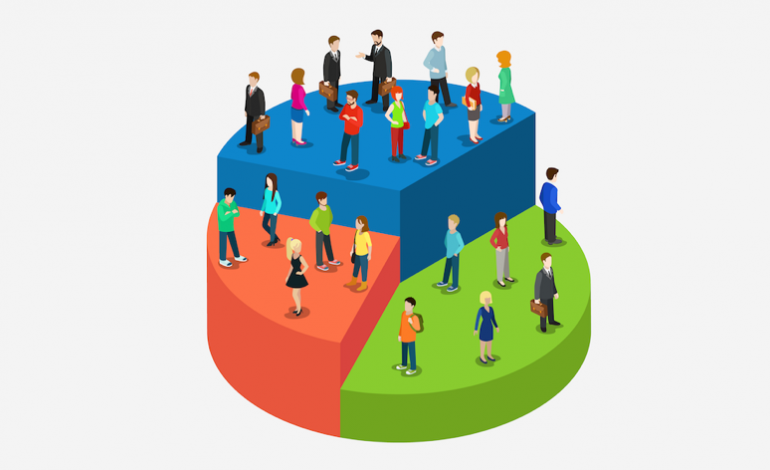

###  What is Customer Segmentation?

> * Customer segmentation is the process of dividing customers into groups based on common characterstics so that the company can market each group effectively and appropriately.<br>
> *  The goal of segmenting customers is to decide how to relate customers in each segment in order to maximize the value of each customer to the business.<br>
> * A customer segmentation analysis allows marketers to identify descrete groups of customers with high degree of accuracy based on demographic, behavioural and other indicators.<br>

### Business Goal:
> * We want to maximize the value from each customer.<br>
>* To acheive this goal, we want to know in advance how any particular marketing action will influence the customer.<br>
>* Customer Segmentation has the potential to allow marketers to address each customer in most effective way and product management department to modify the product according to the distinct need and behavior of the customers.<br>

### Data Goal:
**To acheive the business goal we are using customer segmentation and personality analysis. technically we will be doing :**
>* Clustering for dividing customers in distinct groups.<br>
>* Customer personality analysis to know more about the customers behaviors, Demographic or other indicators.<br>

### Dataset Drive Link

> https://drive.google.com/file/d/1o9pqZHcyJjILbhvaRWf06aQUm4UR2rTZ/view?usp=sharing



### **About The Dataset**

>  **This data is from a groceries firm's database about their customers.** <br>
> **It consists of 2240 datapoints and 29 attributes, which can be categorized into 4 following groups:**

>>**(i) People :** 
>> * **ID :** *Customer's unique identifier* <br>
>> * **Year_Birth :** *Customer's birth year*<br>
>> * **Education :** *Customer's education level*<br>
>> * **Marital_Status :** *Customer's marital status* <br>
>> * **Income :**  *Customer's yearly household income* <br>
>> * **Kidhome :** *Number of children in customer's household* <br>
>> * **Teenhome :** *Number of teenagers in customer's household* <br>
>> * **Dt_Customer :** *Date of customer's enrollment with the company* <br>
>> * **Recency :** *Number of days since customer's last purchase* <br>
>> * **Complain :**  *1 if the customer complained in the last 2 years, 0 otherwise Products* <br>

>>**(ii) Products :**
>>* **MntWines :** *Amount spent on wine in last 2 years* <br>
>>* **MntFruits :** *Amount spent on fruits in last 2 years* <br>
>>* **MntMeatProducts :** *Amount spent on meat in last 2 years* <br>
>>* **MntFishProducts:** *Amount spent on fish in last 2 years* <br>
>>* **MntSweetProducts :** *Amount spent on sweets in last 2 years* <br>
>>* **MntGoldProds :** *Amount spent on gold in last 2 years* <br>
>>* **NumDealsPurchases :** *Number of purchases made with a discount* <br>

>>**(iii) Promotion :**
>>* **AcceptedCmp1 :** *1 if customer accepted the offer in the 1st campaign, 0 otherwise*<br>
>>* **AcceptedCmp2 :** *1 if customer accepted the offer in the 2nd campaign, 0 otherwise*<br>
>>* **AcceptedCmp3 :** *1 if customer accepted the offer in the 3rd campaign, 0 otherwise*<br>
>>* **AcceptedCmp4 :** *1 if customer accepted the offer in the 4th campaign, 0 otherwise*<br>
>>* **AcceptedCmp5 :** *1 if customer accepted the offer in the 5th campaign, 0 otherwise*<br>
>>* **Response :** *1 if customer accepted the offer in the last campaign, 0 otherwise*<br>

>>**(iv) Place :**
>>* **NumWebPurchases :** *Number of purchases made through the company’s website*<br>
>>* **NumCatalogPurchases :** *Number of purchases made using a catalogue*<br>
>>* **NumStorePurchases :** *Number of purchases made directly in stores*<br>
>>* **NumWebVisitsMonth :** *Number of visits to company’s website in the last month*<br>


In [141]:
!pip install yellowbrick

### Importing Required Libraries 

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

### Loading Data Into Dataframe

In [143]:
df = pd.read_csv("marketing_campaign.csv",sep = "\t")
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [144]:
print(f"Rows in the dataset are : {df.shape[0]} \nColumns in the dataset are : {df.shape[1]}")

Rows in the dataset are : 2240 
Columns in the dataset are : 29


### Checking For NULL Values

In [145]:
for i in df.columns:
    if df[i].isna().sum() != 0:
        print(f"Feature Name: {i} \nNaN Value Count : {df[i].isna().sum()}")

Feature Name: Income 
NaN Value Count : 24


* **Calculating Percentage of NULL Values**

In [146]:
p = ((24/2240)*100)
print(f"Percentage of rows having Null values are : {p}")

Percentage of rows having Null values are : 1.0714285714285714


 As the percentage is **1.071%**. So, we can remove the rows from the table as it would not lead to reduction in richness of the data

* **Dropping the rows having NULL values**

In [147]:
df.dropna(inplace = True)

* **Total no of rows after dropping NULL values**

In [148]:
print(f" Rows in the dataframe are : {df.shape[0]} \n Columns in the dataframe are {df.shape[1]}")

 Rows in the dataframe are : 2216 
 Columns in the dataframe are 29


* **Checking for customer ID's**

In [149]:
df["ID"].nunique() 

# This means every customer is unique 

2216

**Conclusion :** *Every customer has unique ID*

In [150]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [151]:
# We can observe that DT_customer is not in format of date time so we convert it

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],dayfirst = True)

In [152]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [153]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### Data Cleaning

* **From DT_Customer**

In [154]:
x = max(df["Dt_Customer"]).date()
x

datetime.date(2014, 6, 29)

In [155]:
# Creating 2 new features Age and the number of days a person has been a customer to the business

datelist = [] 
duration = []
for i in df["Dt_Customer"]:
    datelist.append(i.date())
    
for i in datelist:
    duration.append(x - i)

    
df["Duration"] = duration

In [156]:
df.info
max(df["Duration"])

Timedelta('699 days 00:00:00')

**Conclusion :** *Maximum duration of a customer is **699** days.*

In [157]:
freq = (df["Year_Birth"]<1900).sum()
freq

2

In [158]:
datebirth=[]

for i in df["Year_Birth"]:
    datebirth.append(2014 - i)
df["Age"] = datebirth
    

In [159]:
df.info


<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0            0  2012-09-04       58

In [160]:
df["Duration"].describe()

count                           2216
mean     353 days 12:30:32.490974728
std      202 days 10:25:55.267301594
min                  0 days 00:00:00
25%                180 days 00:00:00
50%                355 days 12:00:00
75%                529 days 00:00:00
max                699 days 00:00:00
Name: Duration, dtype: object

**Conclusion :** *Average Customer Duration is **353** days.*

### Feature Encoding

In [161]:
df["Duration"].quantile(0.2)

Timedelta('140 days 00:00:00')

In [162]:
mnew = df["Duration"] <= df["Duration"].quantile(0.2)
mold = df["Duration"] > df["Duration"].quantile(0.2)
df.loc[mnew,"Customer_Seniority"] = "New"
df.loc[mold,"Customer_Seniority"] = "Old"

In [163]:
df.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
0            0  2012-09-04       58

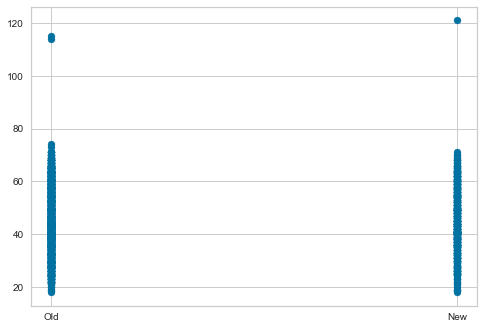

In [164]:
plt.scatter(df.Customer_Seniority,df.Age)

In [165]:
d = df["Age"] > 100
d.value_counts()

False    2213
True        3
Name: Age, dtype: int64

* **Removing Age Outliers** 

In [166]:
df.drop(df[df["Age"]>100].index,inplace = True)

In [167]:
df[df.Age > 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Duration,Age,Customer_Seniority


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a44ae28e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a44ad02b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a44ae2550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a44ad0a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a44ad0ac0>],
 'means': []}

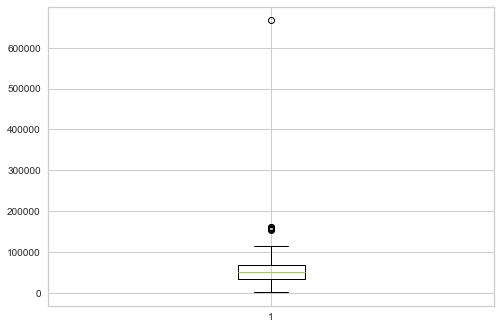

In [168]:
plt.boxplot(df.Income)

In [169]:
df.drop(df[df["Income"]>600000].index,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a44940df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a44956550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a44940a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a44956c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a44972040>],
 'means': []}

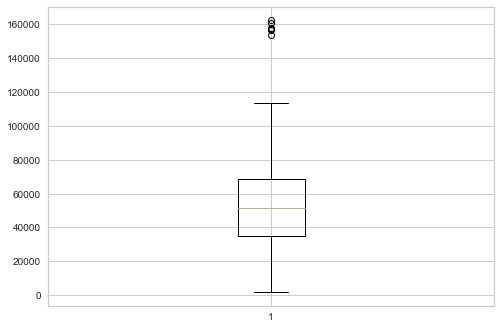

In [170]:
plt.boxplot(df.Income)


In [171]:
df.Education.value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

* **Simplifying the Categorical data**

In [172]:
df["Education"] = df["Education"].replace({"Basic": "Undergraduate","2n Cycle":"Undergraduate","Graduation":"Graduate","Master":"Post-Graduate","PhD":"Post-Graduate"})

In [173]:
df.Education.value_counts()

Graduate         1115
Post-Graduate     845
Undergraduate     252
Name: Education, dtype: int64

In [174]:
df.Marital_Status.value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [175]:
df["Marital_Status"] = df["Marital_Status"].replace({"Married":"Couple","Together":"Couple","Divorced":"Single","Widow":"Single","Alone":"Single"})

In [176]:
df["Marital_Status"].value_counts()

Couple    1428
Single     780
Absurd       2
YOLO         2
Name: Marital_Status, dtype: int64

**Conclusion :** *The percentage of Absurd + YOLO in the data is very low*

* **Dropping Rows with values YOLO and Absurd from Marital_Status Column**

In [177]:
df.drop(df[df["Marital_Status"]== "YOLO"].index,inplace = True)
df.drop(df[df["Marital_Status"]== "Absurd"].index,inplace = True)

In [178]:
df["Marital_Status"].value_counts()

Couple    1428
Single     780
Name: Marital_Status, dtype: int64

In [179]:
# Creating new feature children
df["Children"] = df["Kidhome"]+df["Teenhome"]

In [180]:
df.info

<bound method DataFrame.info of          ID  Year_Birth      Education Marital_Status   Income  Kidhome  \
0      5524        1957       Graduate         Single  58138.0        0   
1      2174        1954       Graduate         Single  46344.0        1   
2      4141        1965       Graduate         Couple  71613.0        0   
3      6182        1984       Graduate         Couple  26646.0        1   
4      5324        1981  Post-Graduate         Couple  58293.0        1   
...     ...         ...            ...            ...      ...      ...   
2235  10870        1967       Graduate         Couple  61223.0        0   
2236   4001        1946  Post-Graduate         Couple  64014.0        2   
2237   7270        1981       Graduate         Single  56981.0        0   
2238   8235        1956  Post-Graduate         Couple  69245.0        0   
2239   9405        1954  Post-Graduate         Couple  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \

In [181]:
df.rename(columns = {"MntWines":"Wine","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"},inplace = True)

In [182]:
df.dtypes

ID                               int64
Year_Birth                       int64
Education                       object
Marital_Status                  object
Income                         float64
Kidhome                          int64
Teenhome                         int64
Dt_Customer             datetime64[ns]
Recency                          int64
Wine                             int64
Fruits                           int64
Meat                             int64
Fish                             int64
Sweets                           int64
Gold                             int64
NumDealsPurchases                int64
NumWebPurchases                  int64
NumCatalogPurchases              int64
NumStorePurchases                int64
NumWebVisitsMonth                int64
AcceptedCmp3                     int64
AcceptedCmp4                     int64
AcceptedCmp5                     int64
AcceptedCmp1                     int64
AcceptedCmp2                     int64
Complain                 

* **Calculating Total Money spent on various items**

In [183]:
df["Total"] = df["Wine"]+df["Fruits"]+df["Meat"]+df["Fish"]+df["Sweets"]+df["Gold"]

In [184]:
df.info

<bound method DataFrame.info of          ID  Year_Birth      Education Marital_Status   Income  Kidhome  \
0      5524        1957       Graduate         Single  58138.0        0   
1      2174        1954       Graduate         Single  46344.0        1   
2      4141        1965       Graduate         Couple  71613.0        0   
3      6182        1984       Graduate         Couple  26646.0        1   
4      5324        1981  Post-Graduate         Couple  58293.0        1   
...     ...         ...            ...            ...      ...      ...   
2235  10870        1967       Graduate         Couple  61223.0        0   
2236   4001        1946  Post-Graduate         Couple  64014.0        2   
2237   7270        1981       Graduate         Single  56981.0        0   
2238   8235        1956  Post-Graduate         Couple  69245.0        0   
2239   9405        1954  Post-Graduate         Couple  52869.0        1   

      Teenhome Dt_Customer  Recency  Wine  ...  AcceptedCmp2  Compl

In [185]:
df.Total.describe()

count    2208.000000
mean      606.903986
std       602.775960
min         5.000000
25%        69.000000
50%       396.000000
75%      1047.250000
max      2525.000000
Name: Total, dtype: float64

* **Dropping Redundant Columns**

In [186]:
to_be_dropped=["ID","Year_Birth","Kidhome","Teenhome","Dt_Customer"]

In [187]:
df.drop(to_be_dropped,axis = 1,inplace = True)

In [188]:
df.dtypes

Education                       object
Marital_Status                  object
Income                         float64
Recency                          int64
Wine                             int64
Fruits                           int64
Meat                             int64
Fish                             int64
Sweets                           int64
Gold                             int64
NumDealsPurchases                int64
NumWebPurchases                  int64
NumCatalogPurchases              int64
NumStorePurchases                int64
NumWebVisitsMonth                int64
AcceptedCmp3                     int64
AcceptedCmp4                     int64
AcceptedCmp5                     int64
AcceptedCmp1                     int64
AcceptedCmp2                     int64
Complain                         int64
Z_CostContact                    int64
Z_Revenue                        int64
Response                         int64
Duration               timedelta64[ns]
Age                      

/var/folders/xc/65_pk7mx5z7fwggyv3ckmrb80000gn/T/ipykernel_4547/3883673207.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


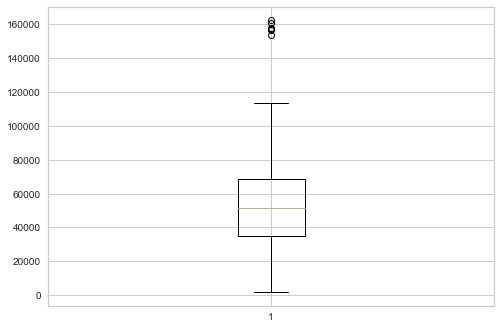

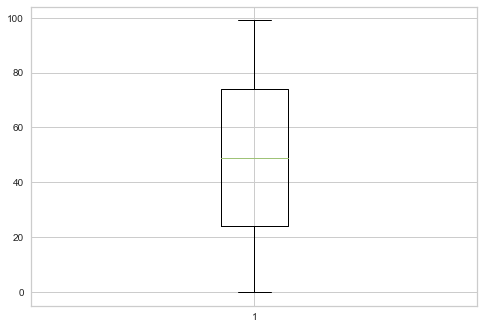

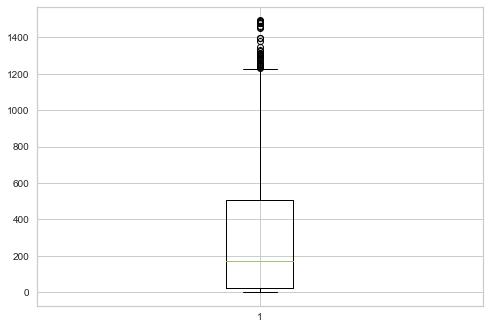

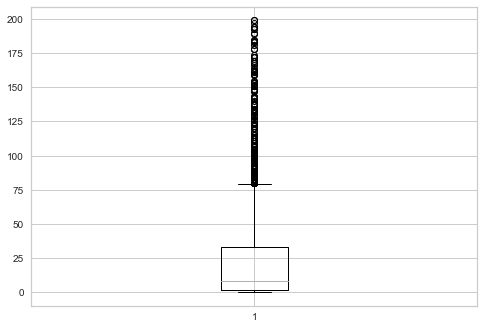

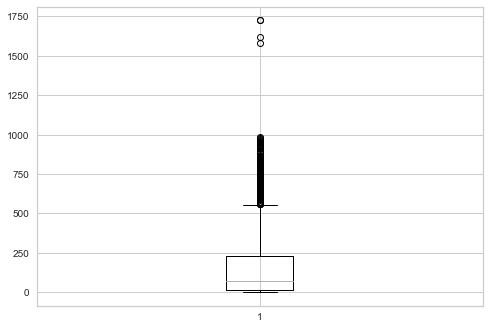

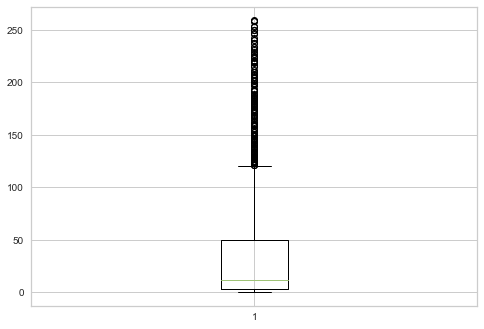

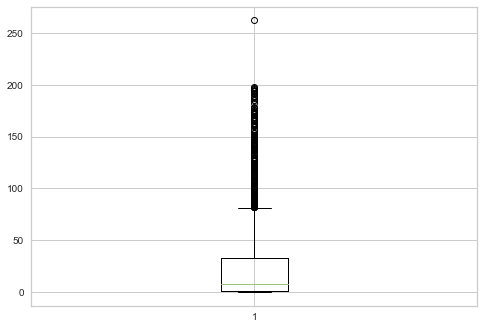

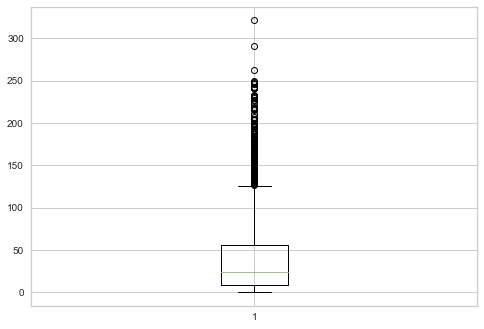

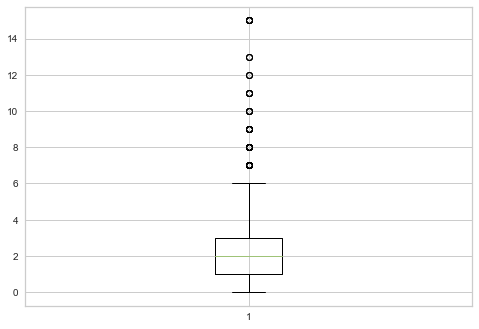

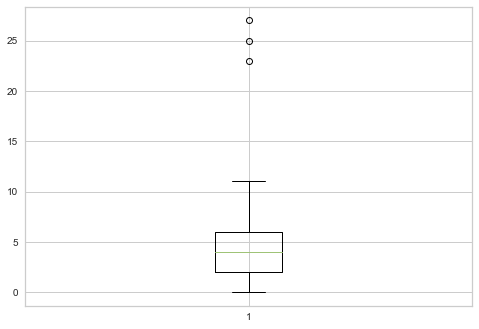

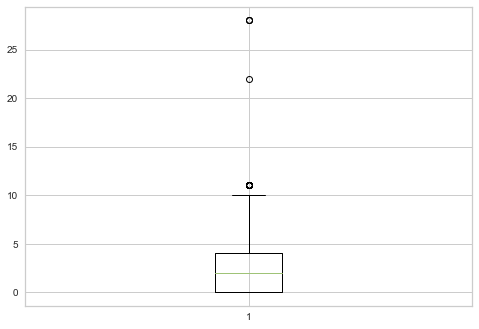

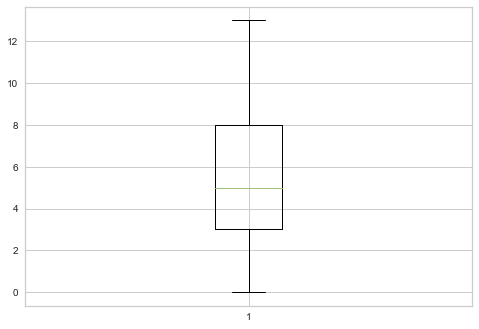

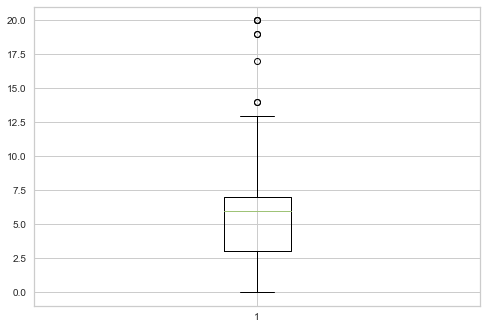

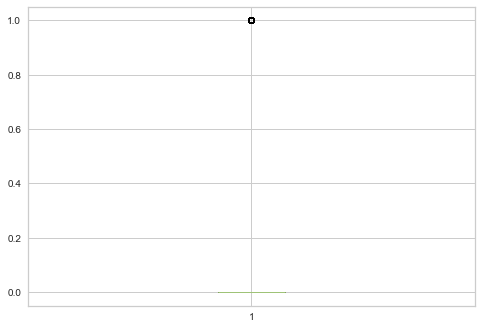

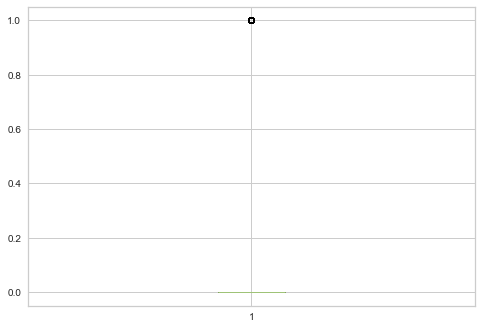

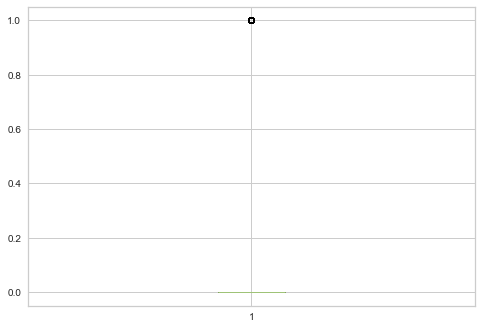

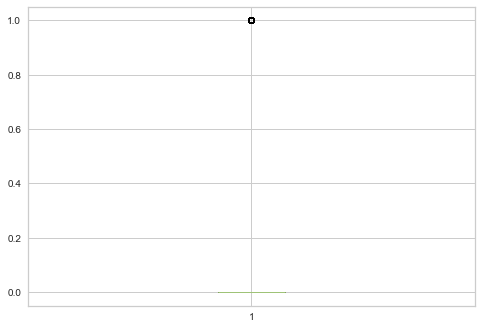

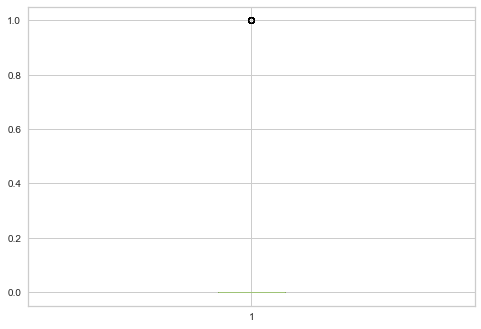

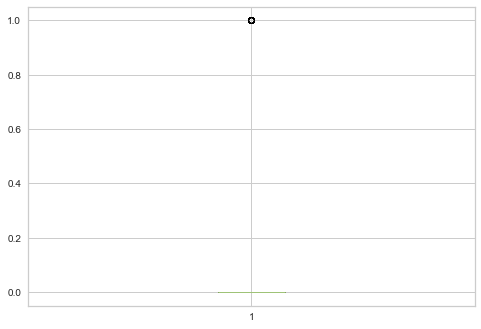

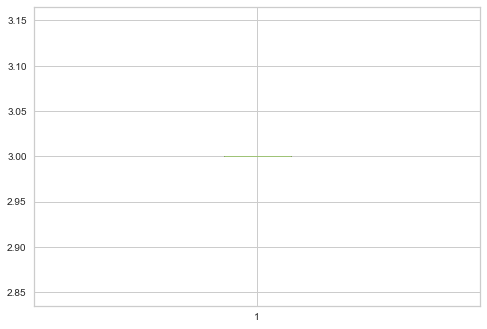

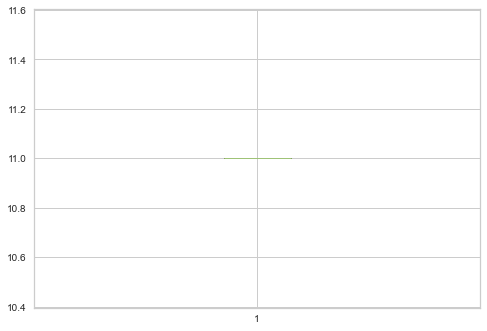

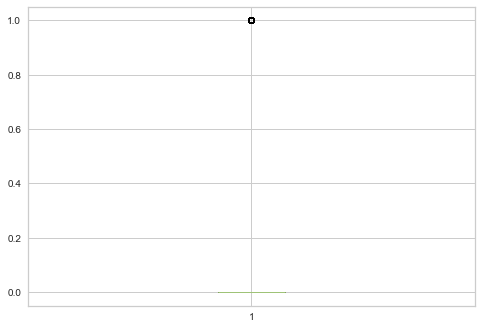

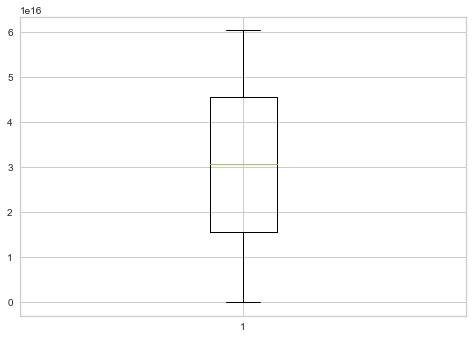

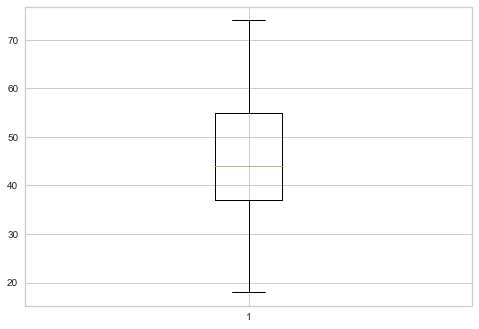

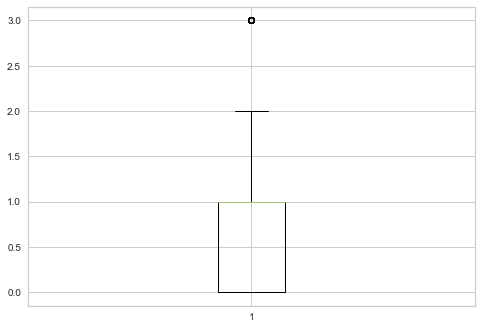

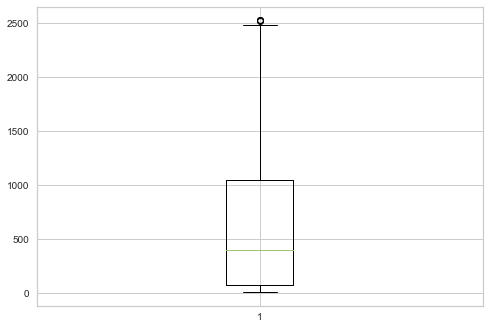

In [189]:
for i in df.columns:
    if df[i].dtype != "object":
        plt.figure(i)
        plt.boxplot(df[i])

In [190]:
df["Marital_Status"] = df["Marital_Status"].replace({"Couple":"1","Single":"0"})
df.drop("Duration",axis = 1,inplace = True)

<br>
<h1 align="left">Data Analysis</h1>
<br>

> * Data analysis is the **practice of working with data to glean useful information**, which can then be used to make informed decisions.
> *A Data analyst analyses the raw data for insights and trends and make use of various tools and techniques to help organizations make decisions and succeed.<br>.
> * **The analysis method typically moves through several iterative phases which are as follow:**
>> 
>> **(1)  Identifing** the business questions.<br> 
>> **(2)  Collecting** the raw data sets.<br>
>> **(3)  Cleaning** the data to prepare it for analysis.<br>
>> **(4)  Analysis** of the collected data.<br>
>> **(5)  Interpreting** the results.<br>

### Benifits of Data Analysis For Customer Based Sectors 

> * Personalize the customer experience<br>
> * Customer Engagement <br>
> * Increased sales <br>


In [191]:
#> * Personalize the customer experience<br>
#> * Personalize the customer experience<br>
#> * Helps individuals and organizations make sense of data.<br>
#>* Data analytics helps individuals and organizations make sense of data.<br>
#>*  Data analysts typically analyze raw data for insights and trends. They use various tools and techniques to #help organizations make decisions and succeed.<br>

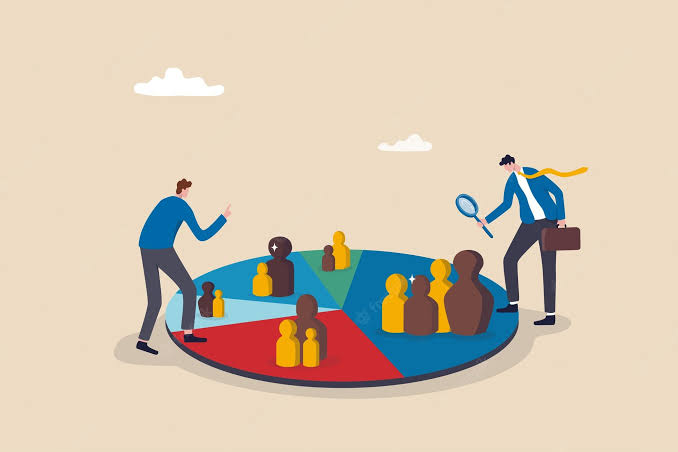

In [192]:
df.groupby("Education")["Total"].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,1114.0,621.655296,600.193049,5.0,70.25,414.5,1075.25,2524.0
Post-Graduate,842.0,646.323040,620.872661,8.0,86.00,427.0,1092.00,2525.0
Undergraduate,252.0,409.984127,510.593842,13.0,50.75,98.0,729.00,2257.0


**Conclusion :** *Maximum money is spend by graduate and post graduates.*
<br>

**Hypothesis 1 :** *People who are more qualified can spend more money on products.*

In [193]:
df.groupby("Education")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,1114.0,52145.45,21348.47,1730.0,34827.5,51965.5,69864.50,157146.0
Post-Graduate,842.0,54720.80,20487.34,4023.0,38751.0,54109.5,68385.75,162397.0
Undergraduate,252.0,41771.25,22828.77,7500.0,23551.5,35916.5,60330.50,96547.0


**Conclusion :** *We can say that customers with higher income can spend more money on products *
<br>

* **Creating new Feature Total_Campaign**

In [194]:
df.dtypes

Education               object
Marital_Status          object
Income                 float64
Recency                  int64
Wine                     int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
Customer_Seniority      object
Children                 int64
Total                    int64
dtype: object

In [195]:
df["Total_Campaign"] = df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]+df["Response"]

In [196]:
df.info

<bound method DataFrame.info of           Education Marital_Status   Income  Recency  Wine  Fruits  Meat  \
0          Graduate              0  58138.0       58   635      88   546   
1          Graduate              0  46344.0       38    11       1     6   
2          Graduate              1  71613.0       26   426      49   127   
3          Graduate              1  26646.0       26    11       4    20   
4     Post-Graduate              1  58293.0       94   173      43   118   
...             ...            ...      ...      ...   ...     ...   ...   
2235       Graduate              1  61223.0       46   709      43   182   
2236  Post-Graduate              1  64014.0       56   406       0    30   
2237       Graduate              0  56981.0       91   908      48   217   
2238  Post-Graduate              1  69245.0        8   428      30   214   
2239  Post-Graduate              1  52869.0       40    84       3    61   

      Fish  Sweets  Gold  ...  AcceptedCmp2  Complain  

* **Dropping Redundant Columns**

In [197]:
df.drop(columns = {"AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"},axis = 1,inplace = True)

In [198]:
df.info

<bound method DataFrame.info of           Education Marital_Status   Income  Recency  Wine  Fruits  Meat  \
0          Graduate              0  58138.0       58   635      88   546   
1          Graduate              0  46344.0       38    11       1     6   
2          Graduate              1  71613.0       26   426      49   127   
3          Graduate              1  26646.0       26    11       4    20   
4     Post-Graduate              1  58293.0       94   173      43   118   
...             ...            ...      ...      ...   ...     ...   ...   
2235       Graduate              1  61223.0       46   709      43   182   
2236  Post-Graduate              1  64014.0       56   406       0    30   
2237       Graduate              0  56981.0       91   908      48   217   
2238  Post-Graduate              1  69245.0        8   428      30   214   
2239  Post-Graduate              1  52869.0       40    84       3    61   

      Fish  Sweets  Gold  ...  NumStorePurchases  NumWe

**Hypothesis 2 :** *Customers with higher average income were specifically targetted with campaigns by the business in the past prior to our investigation.*

In [199]:
df.groupby("Total_Campaign")["Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Total_Campaign,,,,,,,,
0,1606.0,48282.060399,20412.467374,1730.0,33179.25,46916.5,63756.00,162397.0
1,367.0,56773.463215,20379.258528,5648.0,40569.00,58582.0,73791.50,98777.0
2,139.0,61659.035971,21751.934459,7500.0,46015.00,68117.0,78628.00,96843.0
3,50.0,78446.720000,13653.294105,37929.0,75390.00,82138.0,85754.25,105471.0
4,36.0,82143.277778,11521.920233,48192.0,75742.50,82171.5,90253.50,102160.0
5,10.0,86434.400000,9316.599978,65169.0,84561.25,86727.0,90321.75,102692.0


**Conclusion :** *Customer with high average income has accepted more no of campaigns*

* **Detecting all the categorigal variables**

In [200]:
for i in df.columns:
    if df[i].dtypes == "object":
        print(i)

Education
Marital_Status
Customer_Seniority


In [201]:
df.Education.value_counts()

Graduate         1114
Post-Graduate     842
Undergraduate     252
Name: Education, dtype: int64

* **Performing Data Encoding on Categorical Features**

In [202]:
df["Education"] = df["Education"].replace({"Undergraduate":"0","Graduate":"1","Post-Graduate":"2"})

In [203]:
df.Education.value_counts()

1    1114
2     842
0     252
Name: Education, dtype: int64

In [204]:
df.Customer_Seniority.value_counts()

Old    1765
New     443
Name: Customer_Seniority, dtype: int64

In [205]:
df["Customer_Seniority"]= df["Customer_Seniority"].replace({"Old":"1","New":"0"})

In [206]:
df.Customer_Seniority.value_counts()

1    1765
0     443
Name: Customer_Seniority, dtype: int64

* **Creating Correlation Matrix**

<AxesSubplot:>

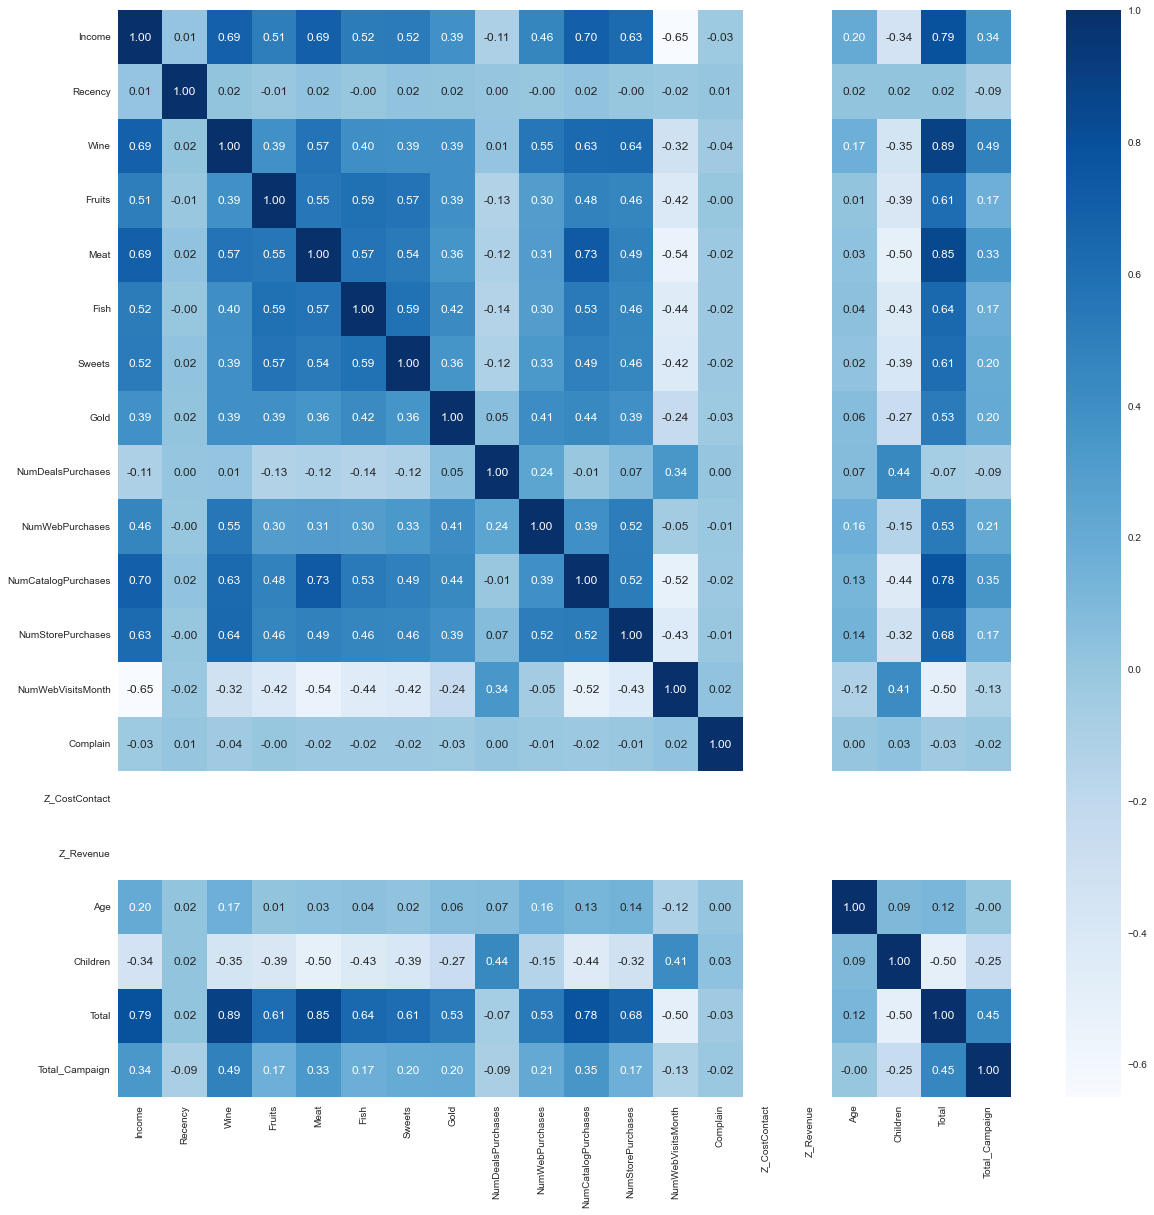

In [207]:
c = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(c,annot=True, fmt=".2f", cmap="Blues")

* **Z_CostContact and Z_Revenue has no correlation**

In [208]:
df.drop({"Z_CostContact","Z_Revenue"},axis = 1,inplace = True)

In [209]:
c=df.corr()

<AxesSubplot:>

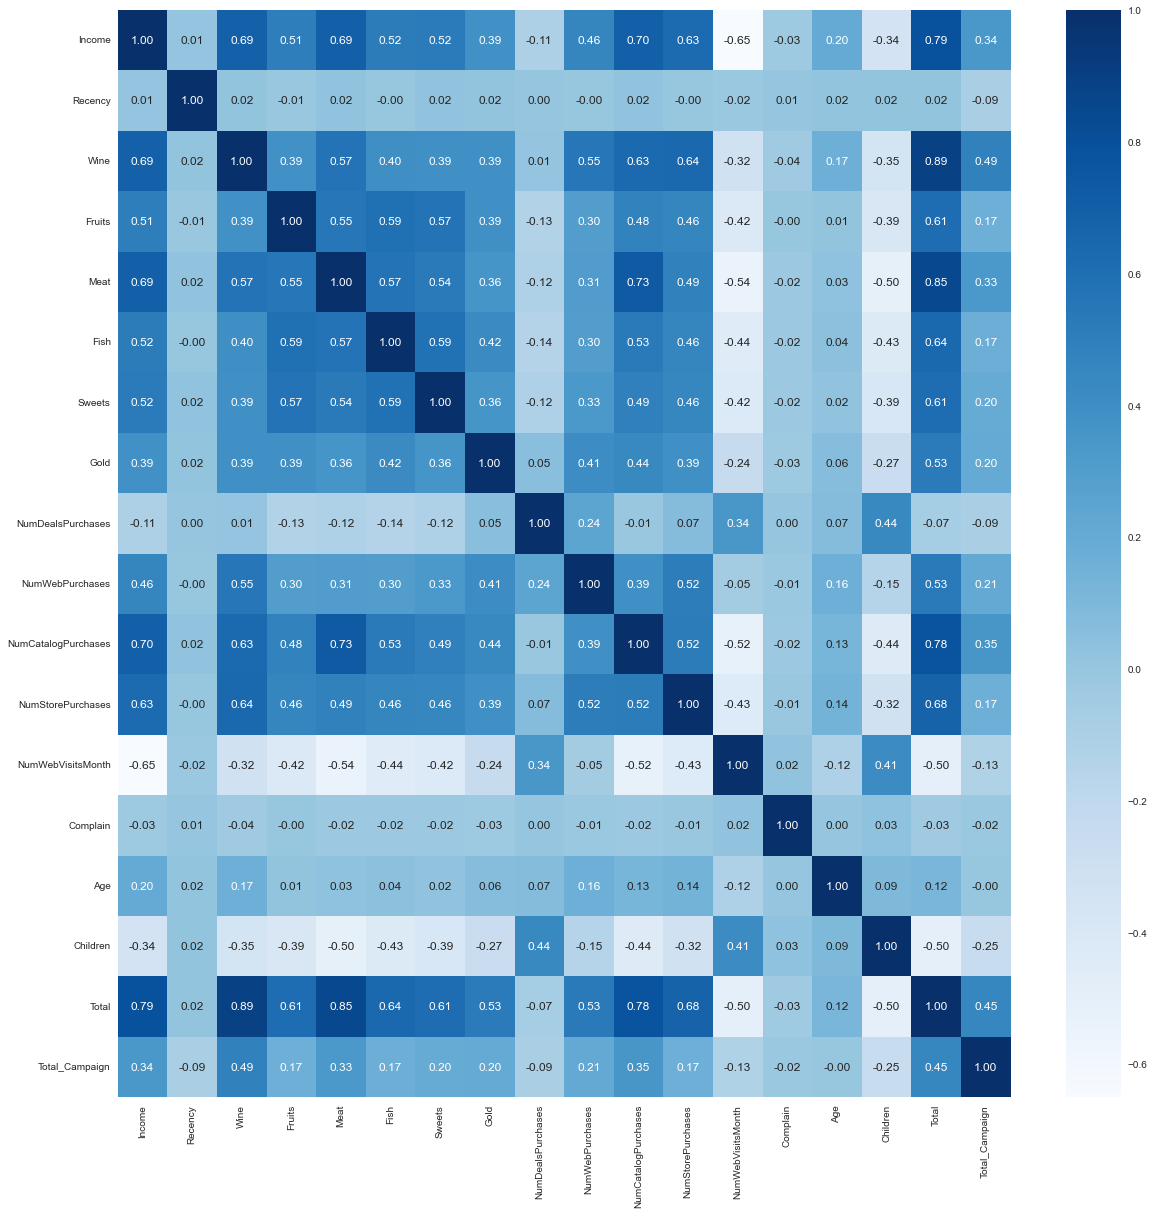

In [210]:
plt.figure(figsize=(20,20))
sns.heatmap(c,annot=True, fmt=".2f", cmap="Blues")

* **Total money spent on Wine**

In [211]:
df[df["Wine"]>0].sum()


Education              1111221222012121120112211112221222201212121012...
Marital_Status         0011110111100101110111110111011010110011110111...
Income                                                       114455117.0
Recency                                                           107572
Wine                                                              673941
Fruits                                                             58035
Meat                                                              368707
Fish                                                               82748
Sweets                                                             59704
Gold                                                               96566
NumDealsPurchases                                                   5112
NumWebPurchases                                                     9008
NumCatalogPurchases                                                 5894
NumStorePurchases                                  

In [212]:
money_Wine = df[df["Wine"]>0].sum().Wine
print(f"Total Money spent on wine is: {money_Wine}")


Total Money spent on wine is: 673941


**Conclusion :** *Maxium money is spent on Wine*

* **Wine vs Marital Status**

In [213]:
 df.groupby("Marital_Status")["Wine"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,780.0,308.992308,338.479023,0.0,23.0,172.5,517.00,1462.0
1,1428.0,303.170168,337.230403,0.0,24.0,175.5,495.25,1493.0


**Conclusion :** *Couples consume more wine.*

* **Wine vs Age**

In [214]:
df.groupby("Age")["Wine"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
18,2.0,1.500000,2.121320,0.0,0.75,1.5,2.25,3.0
19,5.0,284.200000,281.249356,4.0,4.00,283.0,536.00,594.0
20,3.0,659.000000,375.029332,241.0,505.50,770.0,868.00,966.0
21,4.0,371.250000,43.084220,315.0,360.00,375.0,386.25,420.0
22,13.0,253.000000,299.985833,1.0,10.00,154.0,438.00,962.0
23,15.0,549.200000,460.459429,0.0,131.00,490.0,919.00,1332.0
24,18.0,190.833333,292.194587,1.0,11.25,32.0,297.00,863.0
25,29.0,185.379310,287.464583,0.0,8.00,33.0,235.00,957.0
26,29.0,301.448276,391.980556,2.0,6.00,32.0,456.00,1259.0


* **Scaling the dataset in order to bring into a common range**

In [215]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns = df.columns)
print("All features are now scaled")

All features are now scaled


In [216]:
scaled_df.head(4)

,Education,Marital_Status,Income,Recency,Wine,Fruits,Meat,Fish,Sweets,Gold,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Customer_Seniority,Children,Total,Total_Campaign
0,-0.410331,-1.353059,0.287689,0.309118,0.977018,1.553315,1.689944,2.464405,1.482521,0.858552,...,1.427120,2.506603,-0.555083,0.692301,-0.095607,1.017915,0.500991,-1.265454,1.676120,0.619071
1,-0.410331,-1.353059,-0.260057,-0.382230,-0.871705,-0.636864,-0.717917,-0.651086,-0.634157,-0.733610,...,-1.125249,-0.570823,-1.169892,-0.133077,-0.095607,1.274437,-1.996046,1.403240,-0.962274,-0.502265
2,-0.410331,0.739066,0.913505,-0.797039,0.357814,0.571511,-0.178378,1.346494,-0.147565,-0.034612,...,1.427120,-0.228887,1.289346,-0.545767,-0.095607,0.333858,0.500991,-1.265454,0.280592,-0.502265
3,-0.410331,0.739066,-1.174887,-0.797039,-0.871705,-0.561341,-0.655491,-0.504474,-0.585498,-0.753027,...,-0.760624,-0.912759,-0.555083,0.279612,-0.095607,-1.290779,-1.996046,0.068893,-0.919130,-0.502265


In [217]:
df["Education"] = pd.to_numeric(df["Education"])
df["Marital_Status"] = pd.to_numeric(df["Marital_Status"])
df["Customer_Seniority"] = pd.to_numeric(df["Customer_Seniority"])

In [218]:
df.dtypes

Education                int64
Marital_Status           int64
Income                 float64
Recency                  int64
Wine                     int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Age                      int64
Customer_Seniority       int64
Children                 int64
Total                    int64
Total_Campaign           int64
dtype: object

In [219]:
# graduates drink more wine
# df.groupby("Education")["Wine"].describe()

### Model Fitting

* We selected the features that we wanted to keep for clustering and find the optimal number of clusters using elbow method<br>

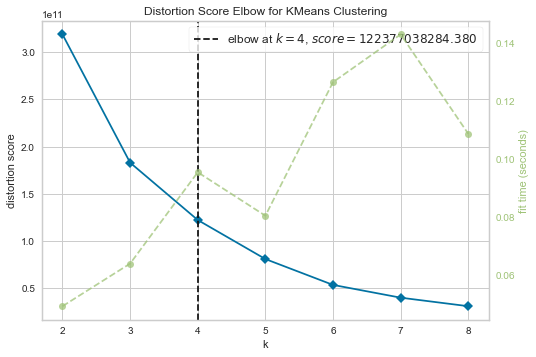

In [220]:
elements = [
    "Education",
    "Marital_Status",
    "Income",
    "Wine",
    "Age",
    "Customer_Seniority",
    "Children",
    "Total",
    "Total_Campaign"
]

elbow = KElbowVisualizer(KMeans(),k = 8)
elbow.fit(df[elements])
elbow.show()
plt.show()

In [221]:
kmeancluster = KMeans(n_clusters=4)
df["kcluster"] = kmeancluster.fit_predict(df[elements])

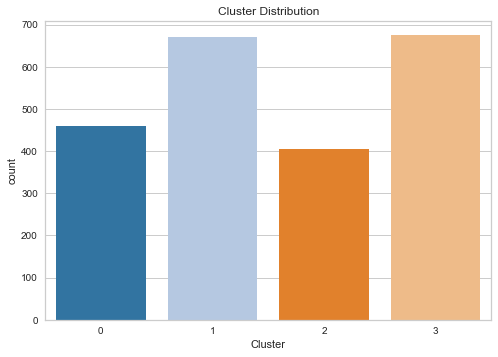

In [222]:
sns.countplot(data=df, x="kcluster", palette="tab20")
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.show()

### Data Exploration

* **Plot Our Clusters between Income and Total money Spent in order to visualise the relationship** 

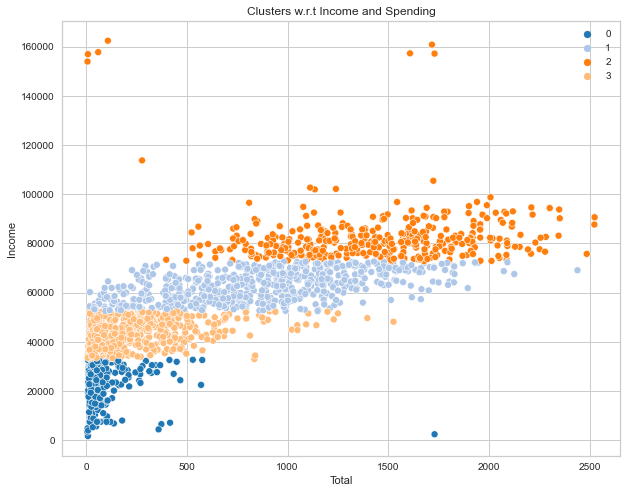

In [223]:
plt.figure(figsize=(10,8))
pl = sns.scatterplot(data = df,x=df["Total"],y=df["Income"],hue = df["kcluster"],palette = "tab20")
pl.set_title("Clusters w.r.t Income and Spending")
plt.legend()
plt.show()


In [224]:
df.groupby("kcluster")["Income"].describe()

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,459.0,23361.509804,6820.240394,1730.0,19380.00,24434.0,28704.50,32727.0
1,670.0,62821.167164,5853.346833,52513.0,57734.25,62938.5,67661.25,72679.0
2,404.0,82725.633663,11793.298692,72828.0,76743.00,80377.5,84672.25,162397.0
3,675.0,42158.552593,5676.738977,32765.0,37152.50,42021.0,46872.50,52413.0


 **Conclusion :** 
> *Cluster 0 : Low Income and Low Spending*<br>
> *Cluster 1 : Average Income and Average Spending*<br>
> *Cluster 2 : High Income and High Speding*<br> 
> *Cluster 3 : Below Average Income and Below Average Spending*<br> 

* **Interpreting the relationship between Income with clusters.**

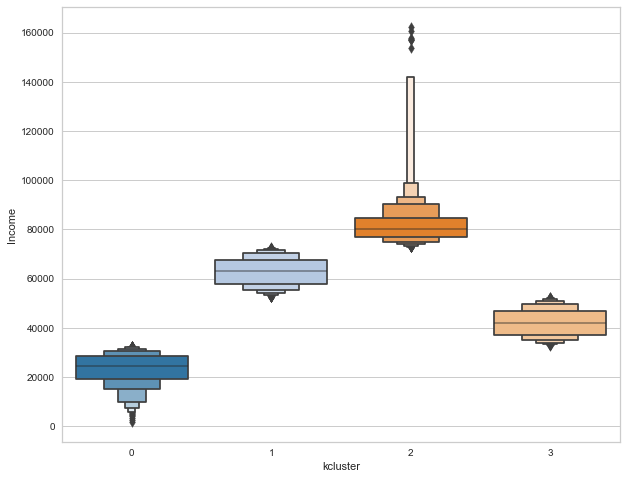

In [225]:
plt.figure(figsize=(10,8))
sns.boxenplot(x = df["kcluster"],y = df["Income"],palette="tab20")
plt.show()

**Conclusion :** *We can clearly interpret that Cluster 2 is our highest income group followed by Cluster 1 and then Cluster 3 and 0.*

* **Interpreting the relationship between total money spending with clusters.** 

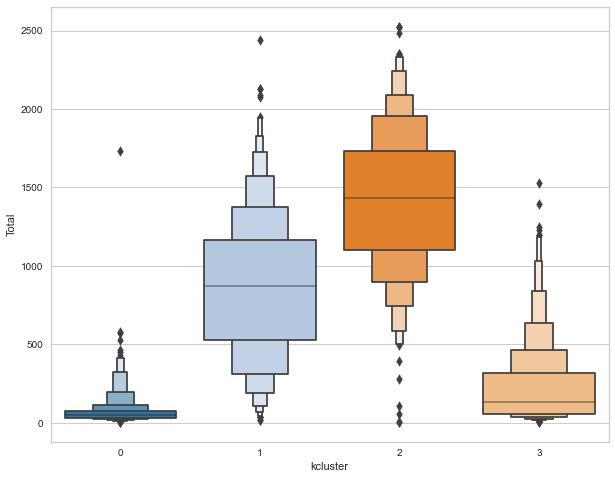

In [226]:
plt.figure(figsize=(10,8))
sns.boxenplot(x = df["kcluster"],y = df["Total"],palette="tab20")
plt.show()

**Conclusion :** *We can clearly interpret that maximum money spending is done by Cluster 2 is followed by Cluster 1 and then Cluster 2 and 0.*

* **Interpreting the relationship between Marital_Status with clusters.** 

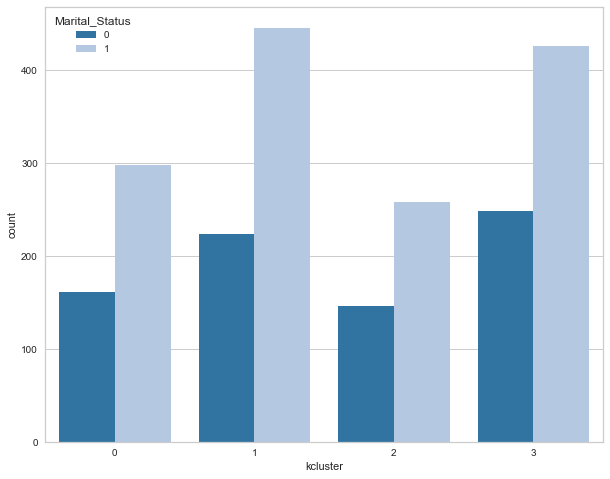

In [227]:
plt.figure(figsize=(10,8)
sns.countplot(x = df["kcluster"],hue = df["Marital_Status"],palette="tab20",l)
plt.show()

**Conclusion** <br>
* We can clearly interpret that maximum married people are in Cluster 1 is followed by Cluster 3 and then Cluster 0 and 2.<br>
* We can clearly interpret that maximum unmarried people are in Cluster 3 is followed by Cluster 1 and then Cluster 0 and 2.<br>

* **Interpreting the relationship between Education with clusters.** 

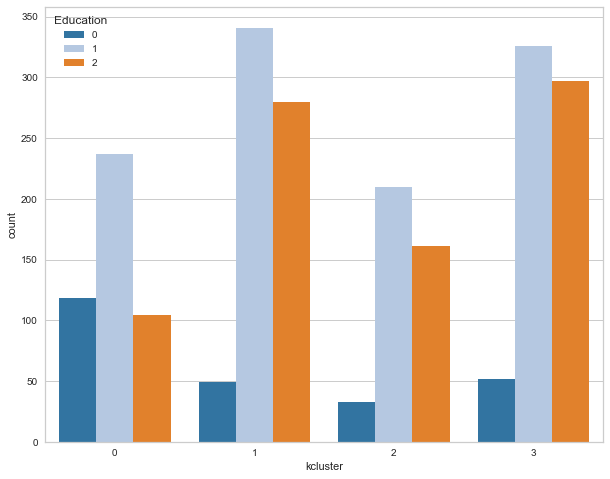

In [228]:
plt.figure(figsize=(10,8))
sns.countplot(x = df["kcluster"],hue = df["Education"],palette="tab20")
plt.show()

**Conclusion** <br>
* We can clearly interpret that maximum Undergraduates are in Cluster 0 is followed by Cluster 3 and then Cluster 1 and 2.<br>
* We can clearly interpret that maximum Graduates people are in Cluster 1 is followed by Cluster 3 and then Cluster 0 and 2.<br>
* We can clearly interpret that maximum Post-Graduates people are in Cluster 3 is followed by Cluster 1 and then Cluster 2 and 0.<br>

* **Interpreting the relationship between Age with clusters.** 

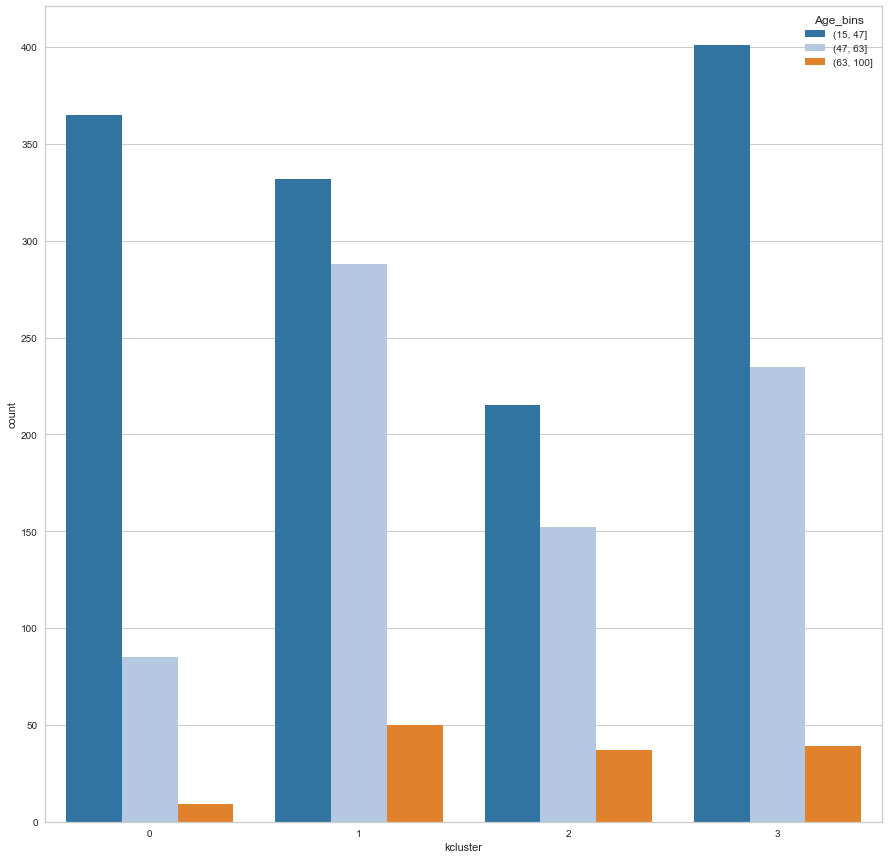

In [249]:
plt.figure(figsize=(15,15))
df["Age_bins"] = pd.cut(df["Age"], bins=[15,47,63,100])
sns.countplot(x = df["kcluster"],hue = df["Age_bins"],palette="tab20")
plt.show()

**Conclusion** <br>
* We can clearly interpret that maximum Young Customers are in Cluster 3 is followed by Cluster 0 and then Cluster 1 and 2.<br>
* We can clearly interpret that maximum Middle Aged Customers are in Cluster 1 is followed by Cluster 3 and then Cluster 2 and 0.<br>
* We can clearly interpret that maximum Old Aged Customers are in Cluster 1 and minimum are in Cluster 0.<br>

* **Interpreting the relationship between Customer_Seniority with clusters.** 

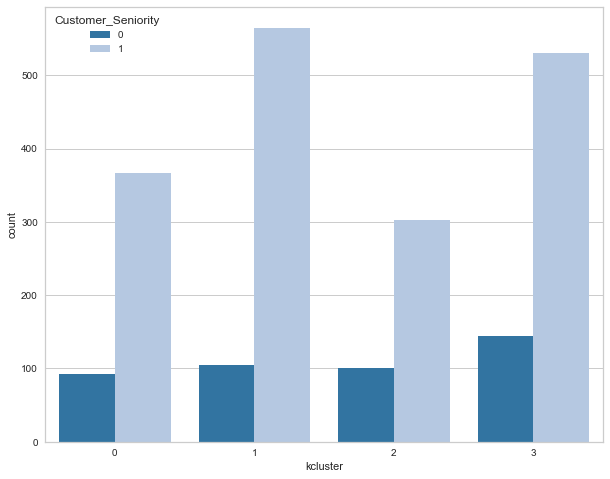

In [230]:
plt.figure(figsize=(10,8))
sns.countplot(x = df["kcluster"],hue = df["Customer_Seniority"],palette="tab20")
plt.show()

**Conclusion** <br>
* We can clearly interpret that maximum New Customers are in Cluster 3 and minimum are in Cluster 0.<br>
* We can clearly interpret that maximum Old Customers are in Cluster 1 is followed by Cluster 3 and then Cluster 0 and 2.<br>

* **Interpreting the relationship between Total_Campaign with clusters.** 

kcluster
0     86
1    243
2    488
3    172
Name: Total_Campaign, dtype: int64


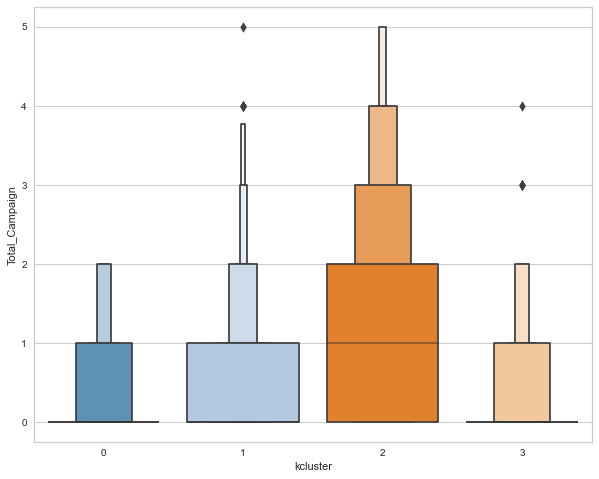

In [279]:
plt.figure(figsize=(10,8))
sns.boxenplot(x = df["kcluster"],y = df["Total_Campaign"],palette="tab20")
print(df.groupby("kcluster")["Total_Campaign"].sum())
plt.show()

**Conclusion** <br>
* We can clearly interpret that maximum Customers Attracted by campaigns are in Cluster 2 is followed by Cluster 1 and then Cluster 3 and 0.<br>


* **Interpreting the relationship between NumDealsPurchases with clusters.**        

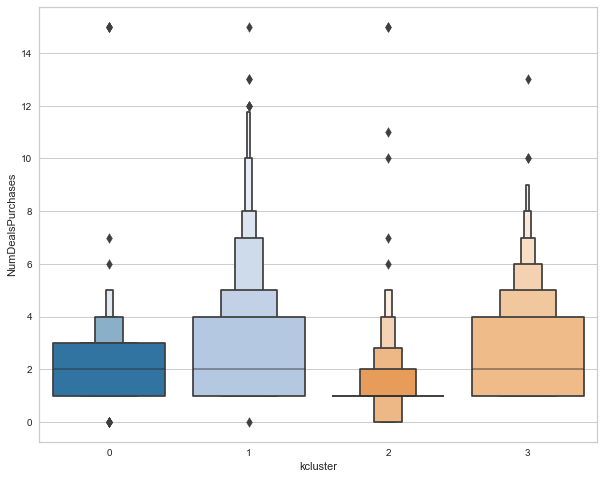

In [270]:
plt.figure(figsize=(10,8))
sns.boxenplot(x = df["kcluster"],y = df["NumDealsPurchases"],palette="tab20")
plt.show()

**Conclusion** <br>
* We can clearly interpret that maximum no.of purchases made due to dicount are in Cluster 1 and minimum in Cluster 2.<br>



* **Interpreting the relationship between NumWebPurchases with clusters.** 

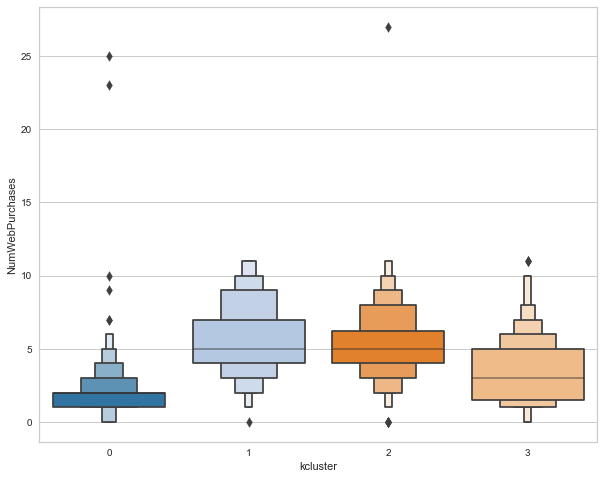

In [275]:
plt.figure(figsize=(10,8))
sns.boxenplot(x = df["kcluster"],y = df["NumWebPurchases"],palette="tab20")
plt.show()

**Conclusion** <br>
* We can clearly interpret that maximum average Online Purchases made by customers are in Cluster 1 and minimum in Cluster 0.<br>



* **Interpreting the relationship between NumCatalogPurchases with clusters.** 

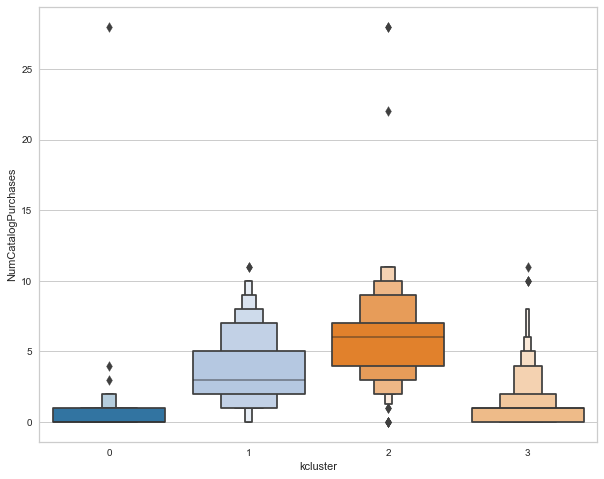

In [268]:
plt.figure(figsize=(10,8))
sns.boxenplot(x = df["kcluster"],y = df["NumCatalogPurchases"],palette="tab20")
plt.show()

**Conclusion** <br>
* We can clearly interpret that maximum Purchases from Catalogs is made by Customers are in Cluster 2 and minimum is made in Cluster 0.<br>



* **Interpreting the relationship between NumStorePurchases with clusters.** 

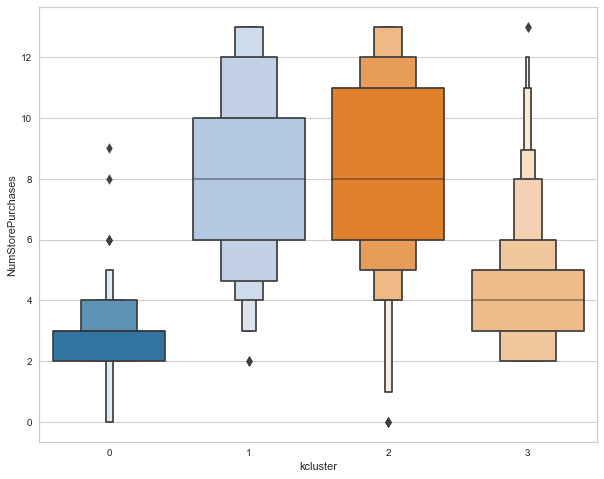

In [267]:
plt.figure(figsize=(10,8))
sns.boxenplot(x = df["kcluster"],y = df["NumStorePurchases"],palette="tab20")
plt.show()

**Conclusion** <br>
* We can clearly interpret that average maximum in Store purchases made by customers are in Cluster 2 is followed by Cluster 1 and then Cluster 3 and 0.<br>



* **Interpreting the relationship between NumWebVisitsMonth with clusters.** 

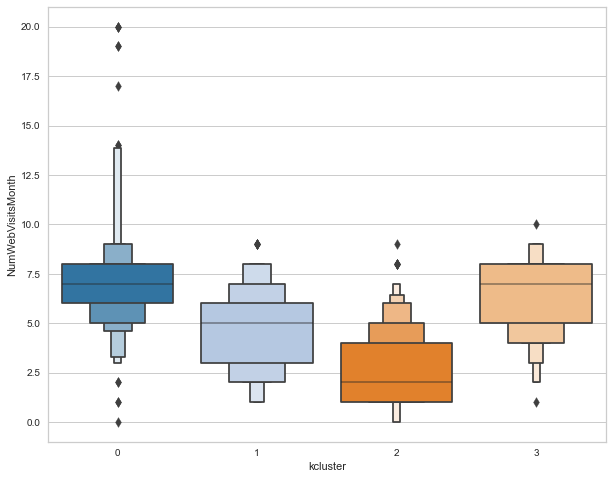

In [266]:
plt.figure(figsize=(10,8))
sns.boxenplot(x = df["kcluster"],y = df["NumWebVisitsMonth"],palette="tab20")
plt.show()

**Conclusion** <br>
* We can clearly interpret that maximum Customers Visits to the company's website are in Cluster 0 is followed by Cluster 3 and then Cluster 1 and 2.<br>



In [273]:
df.groupby("kcluster")[['Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].mean().round(2)

,Wine,Fruits,Meat,Fish,Sweets,Gold
kcluster,,,,,,
0,18.03,5.84,21.64,8.44,5.77,16.43
1,476.26,35.76,205.56,49.91,35.89,62.85
2,657.46,64.48,469.57,90.80,67.56,70.69
3,119.94,7.97,46.50,13.13,8.55,27.35


In [277]:
items = ['Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
alplist = []
for i in items:
    i = pd.DataFrame({i:(df.groupby("kcluster")[i].sum() / df[i].sum() * 100).round(1)})
    alplist.append(i)
pd.concat(alplist, axis=1)

,Wine,Fruits,Meat,Fish,Sweets,Gold
kcluster,,,,,,
0,1.2,4.6,2.7,4.7,4.4,7.8
1,47.3,41.3,37.3,40.4,40.2,43.6
2,39.4,44.9,51.4,44.3,45.7,29.5
3,12.0,9.3,8.5,10.7,9.7,19.1


**Conclusion** <br>
* We can clearly interpret that minimum percentage money spent on grocery and jewellery is by Cluster 0.<br>
* We can clearly interpret that maximum percentage spent on wine is by Cluster 1.<br>
* We can clearly interpret that maximum percentage spent on fruits is by Cluster 2.<br>
* We can clearly interpret that maximum percentage spent on Meat is by Cluster 2.<br>
* We can clearly interpret that maximum percentage spent on Fish is by Cluster 2.<br>
* We can clearly interpret that maximum percentage spent on Sweets is by Cluster 2.<br>
* We can clearly interpret that maximum percentage spent on Sweets is by Cluster 1.<br>

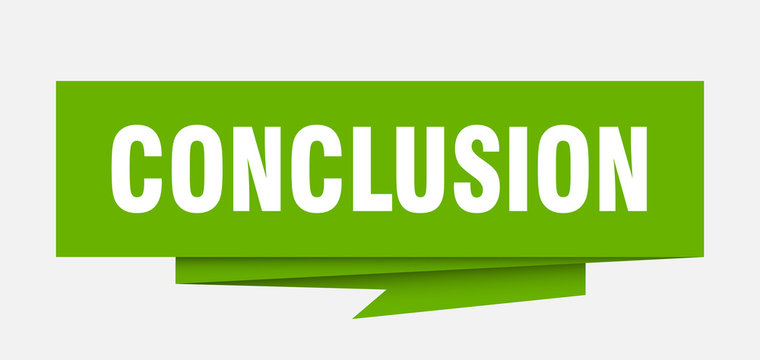

**After going through all the infomation above, we can conclude the profiling of customers in the following way:***

> **Cluster 0:** <br>
>>* Low Income and Low Spending<br>
>>* Least Income in comparison with other clusters<br>
>>* They spend least amount of money <br>
>>* Maximum customers are Undergraduates<br>
>>* It consists of least middle and old aged customers<br>
>>* Consists of minimum new arriving customers<br>
>>* Customers are least attracted by campaigns<br>
>>* They do not prefer to purchase online<br>
>>* Customers Minimum purchases from catalogue<br>
>>* Minimum average visits in store<br>
>>* They visit company website maximum no.of times<br>

> **Cluster 1:**<br>
>>* Average Income and Average Speding<br>
>>* Maximum customers are married<br>
>>* Maximum customers are Graduates<br>
>>* Maximum customers are either middle aged or old aged<br>
>>* Maximum previously existing customers<br>
>>* Maximum purchases made by customers are due to discount<br>
>>* Maximum average online purchases made by customers<br>

> **Cluster 2:**<br>
>>* High Income and High Spending<br>
>>* Highest Income w.r.t to other clusters<br>
>>* Highest Spending w.r.t to other clusters<br>
>>* Minimum previously existing customers<br>
>>* Maximum customers are attracted by campaigns<br>
>>* Minimum customers make purchases during discounts<br>
>>* Maximum purchases are made from catalogue<br>
>>* Maximum average store visits made by customers<br>
>>* Minimum website visits made by customers<br>

> **Cluster 3:**<br>
>>* Below Average Income and Below Average Spending
>>* Maximum customers are unmarried<br>
>>* Maximum customers are Post-graduates<br>
>>* Maximum customers are Young w.r.t Age<br>
>>* Maximum new arriving customers<br>